<a href="https://colab.research.google.com/github/mblackstock/notebooks/blob/main/notebooks/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokemon Battle Analysis

In this project, we'll analyse some Pokemon data to find out which Pokemon are the best!

<img style="float:right" src="https://miro.medium.com/max/1400/0*ZLujw1b18CnMFxFa.jpg" width="500">

For this project, we have two data sources.  The first source is a list of Pokemon and various characteristics.  The second is a table of the results of combat between pokemon, that is, given two Pokemon that battle, who wins.

Let's pretend there is a company called **Team Rocket** who makes millions of dollars off of pokemon battles. As a data consultant, Team Rocket gives you their pokemon data set and ask you to come up with some useful insight on how to improve their business. This can be difficult because there in not much direction given for the analysis.

Lets break down the task.

First, we want to understand the data.  Since the company makes money from battles, we want to direct our efforts toward finding the best pokemon.

We'll start simple, then dive deeper into the data.

Once we've done some analysis, we should relate it to the business to make suggestions for the company on how they can make more money.

References
* https://www.kaggle.com/rounakbanik/pokemon
* https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial
* https://www.kaggle.com/rtatman/which-pokemon-win-the-most/notebook
* https://towardsdatascience.com/exploratory-analysis-of-pokemons-using-r-8600229346fb


# Load Pokemon Data

First, lets make sure we have access to our dataset.  The following two lines change the working directory and then *clone* the github repository containing our data to our local runtime in the cloud.  If the directory datasets is already there, you don't need to run this again and can disable it or comment out the lines.

In [1]:
%cd ..
!git clone https://github.com/mblackstock/datasets.git

/Users/mike/dev/notebooks
fatal: destination path 'datasets' already exists and is not an empty directory.


Next, we'll import the **pandas** library into our notebook so we can use them in our code.  Pandas is the key library we use for file input and output and data processing.  Much of this course will be about becoming familiar with using Python with Pandas.

In [2]:
import pandas as pd

Now we can import the data containing info about different pokemon and have a quick look at it to undestand what we have.

In [3]:
pokemon = pd.read_csv("datasets/pokemon/pokemon.csv")
pokemon.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

The `read_csv()` method loads csv files into our notebook into what is called a `DataFrame` object.

A DataFrame is a pandas data structure that represents a table.  It is contains an array of individual entries, each entry corresponds to a row and column.

The `head()` method gives us the first 5 rows of a `DataFrame` object.  You can specify the number of rows, or use the `tail()` method to get the last rows.

To get to know DataFrames a bit better, lets get the name of the 3rd pokemon, we specify the column, and then the row.

In [54]:
pokemon['Name'][2]

'Venusaur'

We can get  whole rows using loc to specify the row index.  In this case the index is integer values, but as we'll show later, it doesn't need to be.

In [55]:
print(pokemon.loc[2])
print('---------------')
print(pokemon.loc[[2,3]])

#                    3
Name          Venusaur
Type 1           Grass
Type 2          Poison
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object
---------------
   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   

   Speed  Generation  Legendary  
2     80           1      False  
3     80           1      False  


Let's get some more information about the DataFrame using the `info()` method. 



In [56]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Using the `info()` method, we can get lots of interesting and important information about our table (DataFrame).

It tells us about the *index* of our DataFrame.  The index is how we identify the rows in the table.  Here it is a range of values from 0 to 799.

It tells us about all of the columns in each row.  This includes the column number, the name of the column, how many non-null values are in the column, and the type of each column.

It's intersting to note that the Name column has 799 non-null names, meaning there is a pokemon in our table that has a null name.  This could be a problem!



In [23]:
pokemon.rename(columns={"#":"Number"}, inplace=True)
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


The `rename` method renames the columns as specified.  If you say `inplace=False` the original DataFrame is not modified, rather a new one is created and returned with the changed columns.  We'll just modify the current one.

Next, lets look at how many null entries there are in our DataFrame.  This is done by first using the `isNull()` method, that returns a new DataFrame containing booleans for every entry indicating whether it is null or not.

We then want to get the sum of all True entries in each column.  To do this we use the `sum()` method as shown.

In [58]:
print(pokemon.isnull().head())
pokemon.isnull().sum()

   Number   Name  Type 1  Type 2     HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   False  False   False   False  False   False    False    False    False   
1   False  False   False   False  False   False    False    False    False   
2   False  False   False   False  False   False    False    False    False   
3   False  False   False   False  False   False    False    False    False   
4   False  False   False    True  False   False    False    False    False   

   Speed  Generation  Legendary  
0  False       False      False  
1  False       False      False  
2  False       False      False  
3  False       False      False  
4  False       False      False  


Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

We can see there is one null `Name` value, and 386 null `Type 2` values.  `Type 2` can be null since only some Pokemon have secondary classification values.  For example, some pokemon can breathe fire and fly, so its Type 1 would be fire, and its secondary would be `flying`.  Some pokemon don't have a secondary type, so its OK to be null there.

There is one pokemon without a name though.  We should see if we can fix that!

First, lets find the row that contains the null pokemon.  Here's one way to do that

In [59]:
pokemon.loc[pokemon['Name'].isnull()]

Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False

Cool, now that we know which row has a null Name, lets fix the table by setting the name.  Let's assume that the indexes follow the table in the official [National Pokedex Number](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number) table.  Lets look for the one before and after that pokemon, and assume the one missing is between them.


In [60]:
print("The one before is "+pokemon['Name'][61])
print("The one after is "+pokemon['Name'][63])

The one before is Mankey
The one after is Growlithe


The one between Mankey and Growlithe is Primeape, so that's the one.  We can fix it like this:

In [61]:
pokemon['Name'][62] = 'Primeape'
pokemon.loc[62]

<ipython-input-61-13c6e2773b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = 'Primeape'


Number              63
Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

Cool, now that the data is fixed, lets see if we can understand it a bit better.

First, lets generate some general statistics.

In [8]:
pokemon.describe()

#          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

Getting these stats gives a better understanding of the range of values we are working with and the average of these values. We might be able to notice that there are some values that are way outside reasonable ranges.

Next, lets get an idea of what types of pokemon there are.  We can graph Type 1 and Type 2 pokemon.

Text(0.5, 1.0, 'Total Pokemon by Type 1')

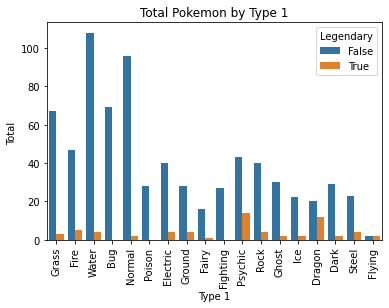

In [5]:
import seaborn as sns #data visualization
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=pokemon)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

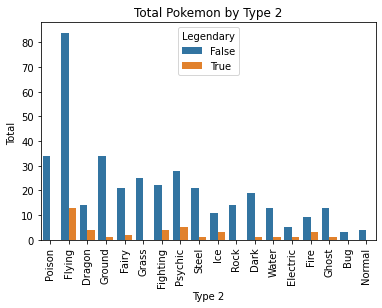

In [7]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=pokemon)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

Now that our pokemon data is cleaned, and we have an idea about our pokemon, lets use the combat data to see if we can figure out which pokemon are the best, and what properties are most important for winning.

# Combat DataFrame

Next, lets load our combat data and have a look at that in the same way.

First, lets load the data, and have a look at it:

In [11]:
combat = pd.read_csv("datasets/pokemon/combats.csv")
combat.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [12]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


We can see that the combat DataFrame has 3 columns, all integers.

The first column, `First_pokemon` is the first pokemon in the fight, `Second_pokemon` is the second, and `Winner` is the winner of the battle.

There are 50000 fights recorded - cool!  The index into the fights is a range of integers like before.

We can also get a quick look at the *shape* of our two tables like this:

In [13]:
print("Dimensions of Pokemon: " + str(pokemon.shape))
print("Dimensions of Combat: " + str(combat.shape))

Dimensions of Pokemon: (800, 12)
Dimensions of Combat: (50000, 3)


Lets calculate get the total wins for each pokemon.  To do this, we will count the number of unique values of the Winner column using the `value_counts()` method.

In [14]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
total_Wins

163    152
438    136
154    136
428    134
314    133
      ... 
189      5
639      4
237      4
190      3
290      3
Name: Winner, Length: 783, dtype: int64

You can see that pokemon number 163 won 152 battles, pokemon 438 won 136 battles, etc..

There are a couple of things to note here.  Notice how we can access the Winner column using the dot notation `combat.Winner` in addition to the array syntax `combat['Winner']`.

Another thing to note is that total_Wins is a *Series*, not a DataFrame.  A Series is simply a series of data values.  If you think of a DataFrame as a table, a Series is a list, or really just a single column of a DataFrame.  A Series and a DataFrame are intimately related.  You can think of a DataFrame as a bunch of Series that are glued together, so when we get one column of a DataFrame like Winner, we get a series.

The `value_counts()` method gives us a series where the index comes from the Winner column, and the value is the count of the number of times that value appears in the column.

We can see that 783 different pokemon won at least one battle.

Lets see how many pokemon actually participated in *any* battle.  How can we do this?

Let's try to understand how many pokemon were actually participating as either a First_pokemon or a Second_pokemon.  To do this lets use the `groupby()` method.

This method will create a new DataFrame where the index is the First_pokemon, and the other columns are an *aggregate* of the others.  Different aggregate functions include `sum`, `mean` (average), or `count`.

Lets get the number of times a given pokemon that was in the First_pokemon column appears in the data.

In [15]:
# get the number of wins for each pokemon
countByFirst = combat.groupby('First_pokemon').count()
countByFirst

Second_pokemon  Winner
First_pokemon                        
1                          70      70
2                          55      55
3                          68      68
4                          62      62
5                          50      50
...                       ...     ...
796                        49      49
797                        64      64
798                        60      60
799                        75      75
800                        61      61

[784 rows x 2 columns]

From this we can see that pokemon 1 participated as First_pokemon 70 times, 2 55 times, etc..

Lets do the same for the Second_pokemon.

In [16]:
#both methods produce the same results
countBySecond = combat.groupby('Second_pokemon').count()
countBySecond



First_pokemon  Winner
Second_pokemon                       
1                          63      63
2                          66      66
3                          64      64
4                          63      63
5                          62      62
...                       ...     ...
796                        56      56
797                        67      67
798                        59      59
799                        69      69
800                        60      60

[784 rows x 2 columns]

There are 784 total rows in the data, meaning that 784 different pokemon participated in combat as the Second_pokemon too.  Lets summarize this

In [17]:
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


## Set Difference using Numpy

So we know that there were 784 pokemon that played as both first and second, but we found that there were only 783 unique wins!  What happened?

It looks like there was one pokemon that never won a battle!  How can we figure out which one?

We can use the `numpy` library to get the difference between the two indexes of the `countByFirst` DataFrame and the `numberOfWins` Series.

Numpy is a Python library like Pandas that provides a very simple and powerful data structure - the n-dimensional array.  The Pandas library is built on top of Numpy.  We'll learn more about Numpy later in the course.

To get the set difference we can use the numpy `setdiff1d` method to get the difference between two one dimensional arrays (vectors).  For example:


In [18]:
import numpy as np

a = np.array([1,2,3,2,4,1])
b = np.array([3,4,5,6])

np.setdiff1d(a,b)


array([1, 2])

Lets get the values of the two indexes we are interested in, then find the set difference:

In [19]:
losing_pokemon_array= np.setdiff1d(countByFirst.index.values, total_Wins.index.values) #offset 
losing_pokemon_array

array([231])

Now we look up the row that has that pokemon number in it to find out which pokemon it is:

In [24]:
losing_pokemon = pokemon[pokemon['Number'] == losing_pokemon_array[0]] 
print(losing_pokemon.iloc[0])

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


Looks like Shuckle never wins a battle!

We want to be able to rate pokemon in terms of the number of wins, but it looks like we may have some missing pokemon if they never win.

Let's create a new DataSet called numberOfWins to calculate the percentage of time a given pokemon wins.  First, we'll use `groupby()`.

GroupBy creates a new DataSet where the index is the values of the column selected, and then all other columns are aggregated using a function like `sum()` or `count()`.  Lets count how many times the pokemon win.


In [25]:
numberOfWins = combat.groupby('Winner').count();
numberOfWins.sort_index()

First_pokemon  Second_pokemon
Winner                               
1                  37              37
2                  46              46
3                  89              89
4                  70              70
5                  55              55
...               ...             ...
796                39              39
797               116             116
798                60              60
799                89              89
800                75              75

[783 rows x 2 columns]

lets add the missing pokemon that never won

In [26]:

numberOfWins.loc[231] = [0, 0]
numberOfWins.loc[231]

First_pokemon     0
Second_pokemon    0
Name: 231, dtype: int64

Note that the first and second columns are the same, since they are just a count as to how often these columns appear when the pokemon is the winner.  We can choose either to determine how often they won.

Now we'll calculate the number of wins, and add that new column.

In [27]:
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner

Now we can calculate the Win Percentage!

In [28]:
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

First_pokemon       0.0
Second_pokemon      0.0
Total Fights      135.0
Win Percentage      0.0
Name: 231, dtype: float64

Now lets merge this dataset with the pokemon dataframe.  This merge will keep the rows where there is a number in both tables.  

In [29]:
results = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
del results['First_pokemon']    # drop these columns, we don't want them
del results['Second_pokemon']
results

Number            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0         1       Bulbasaur    Grass  Poison  45      49       49       65   
1         2         Ivysaur    Grass  Poison  60      62       63       80   
2         3        Venusaur    Grass  Poison  80      82       83      100   
3         4   Mega Venusaur    Grass  Poison  80     100      123      122   
4         5      Charmander     Fire     NaN  39      52       43       60   
..      ...             ...      ...     ...  ..     ...      ...      ...   
795     796         Diancie     Rock   Fairy  50     100      150      100   
796     797    Mega Diancie     Rock   Fairy  50     160      110      160   
797     798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798     799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799     800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  Total Fights  Win Percentage  
0         65     45           1      False           133        0.278195  
1         80     60           1      False           121        0.380165  
2        100     80           1      False           132        0.674242  
3        120     80           1      False           125        0.560000  
4         50     65           1      False           112        0.491071  
..       ...    ...         ...        ...           ...             ...  
795      150     50           6       True           105        0.371429  
796      110    110           6       True           131        0.885496  
797      130     70           6       True           119        0.504202  
798      130     80           6       True           144        0.618056  
799       90     70           6       True           121        0.619835  

[784 rows x 14 columns]

While this is better, we also want to know which pokemon were not in any battles.  To do this we can use the following merge parameters:

In [30]:
merged_results = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')
del merged_results['First_pokemon']
del merged_results['Second_pokemon']
merged_results

Number            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0         1       Bulbasaur    Grass  Poison  45      49       49       65   
1         2         Ivysaur    Grass  Poison  60      62       63       80   
2         3        Venusaur    Grass  Poison  80      82       83      100   
3         4   Mega Venusaur    Grass  Poison  80     100      123      122   
4         5      Charmander     Fire     NaN  39      52       43       60   
..      ...             ...      ...     ...  ..     ...      ...      ...   
795     796         Diancie     Rock   Fairy  50     100      150      100   
796     797    Mega Diancie     Rock   Fairy  50     160      110      160   
797     798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798     799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799     800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  Total Fights  Win Percentage  
0         65     45           1      False         133.0        0.278195  
1         80     60           1      False         121.0        0.380165  
2        100     80           1      False         132.0        0.674242  
3        120     80           1      False         125.0        0.560000  
4         50     65           1      False         112.0        0.491071  
..       ...    ...         ...        ...           ...             ...  
795      150     50           6       True         105.0        0.371429  
796      110    110           6       True         131.0        0.885496  
797      130     70           6       True         119.0        0.504202  
798      130     80           6       True         144.0        0.618056  
799       90     70           6       True         121.0        0.619835  

[800 rows x 14 columns]

We can see that there are some pokemon that weren't in any battles

In [31]:
merged_results.loc[merged_results['Win Percentage'].isnull()]

Number                  Name    Type 1   Type 2   HP  Attack  Defense  \
11       12             Blastoise     Water      NaN   79      83      100   
32       33             Sandshrew    Ground      NaN   50      75       85   
45       46            Wigglytuff    Normal    Fairy  140      70       45   
65       66               Poliwag     Water      NaN   40      50       40   
77       78            Victreebel     Grass   Poison   80     105       65   
89       90              Magneton  Electric    Steel   50      60       95   
143     144                 Ditto    Normal      NaN   48      48       48   
182     183               Ariados       Bug   Poison   70      90       70   
235     236              Ursaring    Normal      NaN   90     130       75   
321     322              Hariyama  Fighting      NaN  144     120       60   
418     419           Mega Latias    Dragon  Psychic   80     100      120   
478     479             Honchkrow      Dark   Flying  100     125       52   
555     556               Servine     Grass      NaN   60      60       75   
617     618              Maractus     Grass      NaN   75      86       67   
654     655             Jellicent     Water    Ghost  100      60       70   
781     782  Pumpkaboo Small Size     Ghost    Grass   44      66       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total Fights  \
11        85      105     78           1      False           NaN   
32        20       30     40           1      False           NaN   
45        85       50     45           1      False           NaN   
65        40       40     90           1      False           NaN   
77       100       70     70           1      False           NaN   
89       120       70     70           1      False           NaN   
143       48       48     48           1      False           NaN   
182       60       60     40           2      False           NaN   
235       75       75     55           2      False           NaN   
321       40       60     50           3      False           NaN   
418      140      150    110           3       True           NaN   
478      105       52     71           4      False           NaN   
555       60       75     83           5      False           NaN   
617      106       67     60           5      False           NaN   
654       85      105     60           5      False           NaN   
781       44       55     56           6      False           NaN   

     Win Percentage  
11              NaN  
32              NaN  
45              NaN  
65              NaN  
77              NaN  
89              NaN  
143             NaN  
182             NaN  
235             NaN  
321             NaN  
418             NaN  
478             NaN  
555             NaN  
617             NaN  
654             NaN  
781             NaN

Lets change the total fights to 0 rather than null so we can filter on that.

In [32]:
merged_results.loc[merged_results['Total Fights'].isnull(),'Total Fights'] = 0
merged_results

Number            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0         1       Bulbasaur    Grass  Poison  45      49       49       65   
1         2         Ivysaur    Grass  Poison  60      62       63       80   
2         3        Venusaur    Grass  Poison  80      82       83      100   
3         4   Mega Venusaur    Grass  Poison  80     100      123      122   
4         5      Charmander     Fire     NaN  39      52       43       60   
..      ...             ...      ...     ...  ..     ...      ...      ...   
795     796         Diancie     Rock   Fairy  50     100      150      100   
796     797    Mega Diancie     Rock   Fairy  50     160      110      160   
797     798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798     799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799     800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  Total Fights  Win Percentage  
0         65     45           1      False         133.0        0.278195  
1         80     60           1      False         121.0        0.380165  
2        100     80           1      False         132.0        0.674242  
3        120     80           1      False         125.0        0.560000  
4         50     65           1      False         112.0        0.491071  
..       ...    ...         ...        ...           ...             ...  
795      150     50           6       True         105.0        0.371429  
796      110    110           6       True         131.0        0.885496  
797      130     70           6       True         119.0        0.504202  
798      130     80           6       True         144.0        0.618056  
799       90     70           6       True         121.0        0.619835  

[800 rows x 14 columns]

Now, lets get a list of the worst pokemon in terms of win percentage for those that fought.  Shuckle is at the bottom as expected.  

In [33]:
merged_results[merged_results['Total Fights']>0].sort_values(by = ['Win Percentage']).head(10)

Number       Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
230     231    Shuckle      Bug    Rock  20      10      230       10   
289     290    Silcoon      Bug     NaN  50      35       55       25   
189     190     Togepi    Fairy     NaN  35      20       65       40   
638     639    Solosis  Psychic     NaN  45      30       40      105   
236     237     Slugma     Fire     NaN  40      40       40       70   
576     577      Munna  Psychic     NaN  76      25       45       67   
188     189  Igglybuff   Normal   Fairy  90      30       15       40   
394     395     Wynaut  Psychic     NaN  95      23       48       23   
209     210     Wooper    Water  Ground  55      45       45       25   
291     292    Cascoon      Bug     NaN  50      35       55       25   

     Sp. Def  Speed  Generation  Legendary  Total Fights  Win Percentage  
230      230      5           2      False         135.0        0.000000  
289       25     15           3      False         138.0        0.021739  
189       65     20           2      False         122.0        0.024590  
638       50     20           5      False         129.0        0.031008  
236       40     20           2      False         123.0        0.032520  
576       55     24           5      False         128.0        0.039062  
188       20     15           2      False         115.0        0.043478  
394       48     23           3      False         130.0        0.046154  
209       25     15           2      False         125.0        0.048000  
291       25     15           3      False         133.0        0.052632

In [ ]:
We can check the best ones too.

In [34]:
merged_results[merged_results['Total Fights']>0].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

Number                      Name   Type 1    Type 2   HP  Attack  \
154     155           Mega Aerodactyl     Rock    Flying   80     135   
512     513                   Weavile     Dark       Ice   70     120   
703     704    Tornadus Therian Forme   Flying       NaN   79     100   
19       20             Mega Beedrill      Bug    Poison   65     150   
153     154                Aerodactyl     Rock    Flying   80     105   
476     477              Mega Lopunny   Normal  Fighting   65     136   
726     727                  Greninja    Water      Dark   72      95   
716     717  Meloetta Pirouette Forme   Normal  Fighting  100     128   
164     165             Mega Mewtwo Y  Psychic       NaN  106     150   
349     350             Mega Sharpedo    Water      Dark   70     140   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total Fights  \
154       85       70       95    150           1      False         129.0   
512       65       45       85    125           4      False         119.0   
703       80      110       90    121           5       True         125.0   
19        40       15       80    145           1      False         119.0   
153       65       60       75    130           1      False         141.0   
476       94       54       96    135           4      False         129.0   
726       67      103       71    122           6      False         127.0   
716       90       77       77    128           5      False         123.0   
164       70      194      120    140           1       True         125.0   
349       70      110       65    105           3      False         120.0   

     Win Percentage  
154        0.984496  
512        0.974790  
703        0.968000  
19         0.966387  
153        0.964539  
476        0.961240  
726        0.960630  
716        0.959350  
164        0.952000  
349        0.950000

Lets 

In [35]:
merged_results.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

Win Percentage
Type 1                  
Fairy           0.329300
Rock            0.404852
Steel           0.424529
Bug             0.432550
Poison          0.433262
Ice             0.439604
Grass           0.440364
Water           0.469357
Fighting        0.475616
Ghost           0.484027
Normal          0.535578
Ground          0.541526
Psychic         0.545747
Fire            0.579215
Dark            0.629726
Electric        0.632861
Dragon          0.633587
Flying          0.765061

# Visualizing

Now that we have a good undertanding of our data, lets visualize!
lets make a bunch of scatter plots of the various factors to see if there is a correlation.

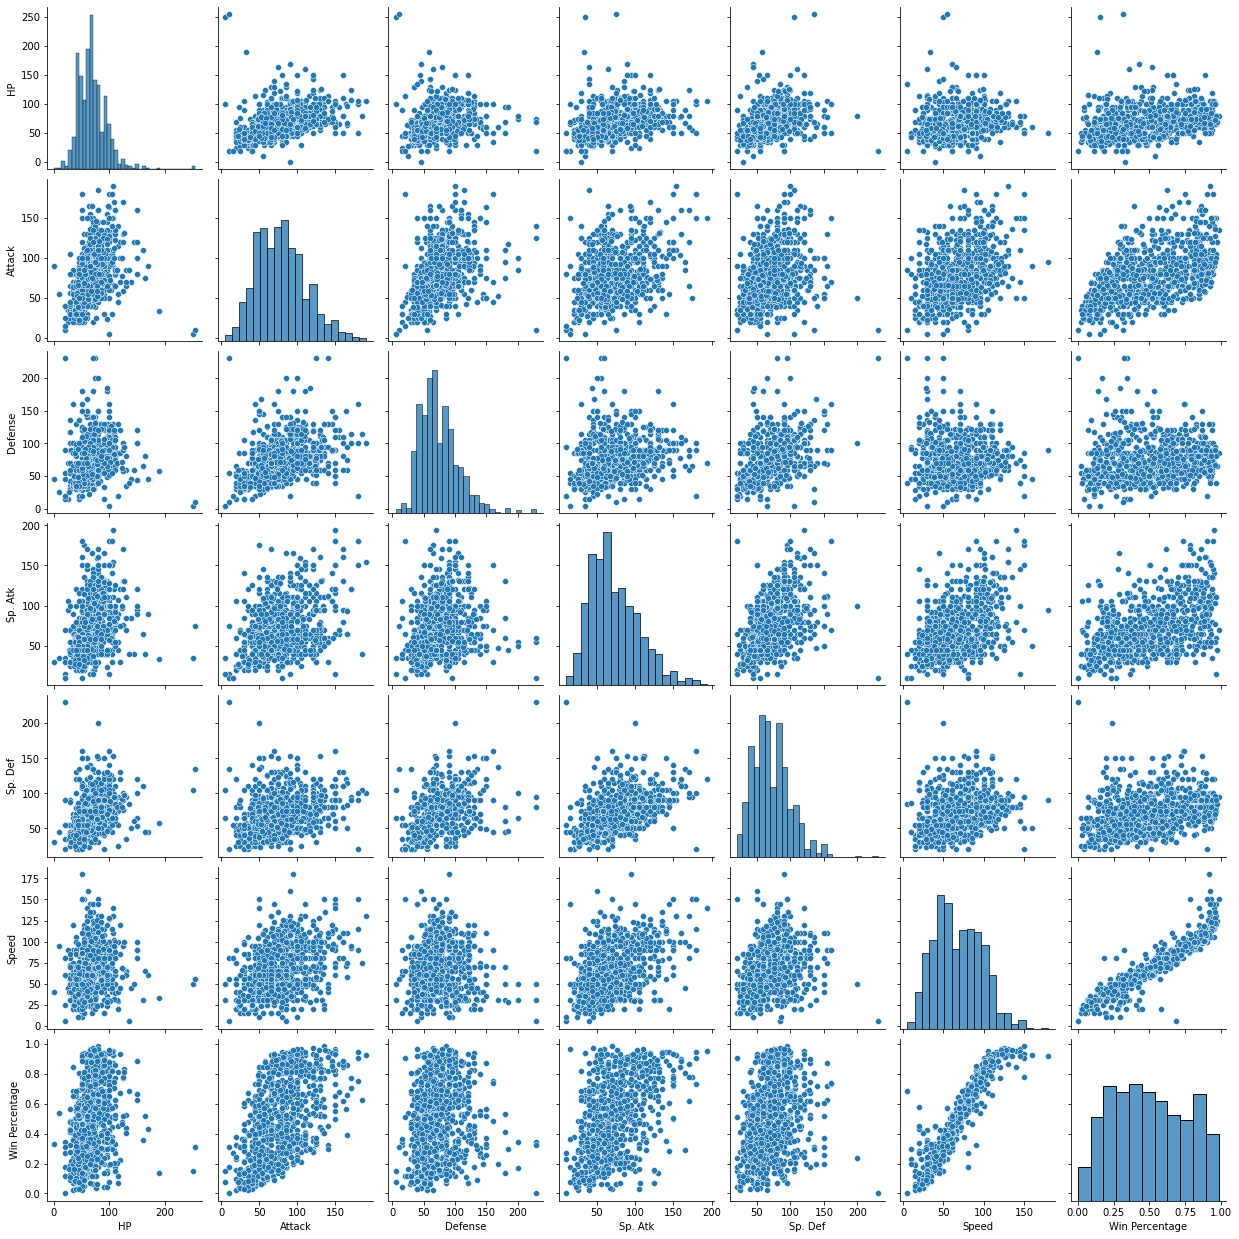

In [42]:
col = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(merged_results.loc[:,col])